<a href="https://colab.research.google.com/github/Zeeshan2012/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HEALTH INSURANCE CROSS SELL PREDICTION/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
#make a Dataset Copy
df= data.copy()

In [30]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [31]:
#check for rows and columns
df.shape

(381109, 12)

There are around 381109 rows and 12 columns in the Dataset

In [32]:
#check for Null Values and Duplicate values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [33]:
df[df.duplicated()]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


There are non Null and Duplicate Values

In [34]:
#check Statics
df.describe(include= 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


From the Above Stats we can say Driving License previously insured and Response are having Categorical values 0 and 1

In [35]:
#Check for irrelevant columns
# We can drop the ID column as it is just work as a index
df.drop(['id'], axis = 1, inplace = True)

In [36]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

Text(0.5, 1.0, 'Count of Boys and Girls')

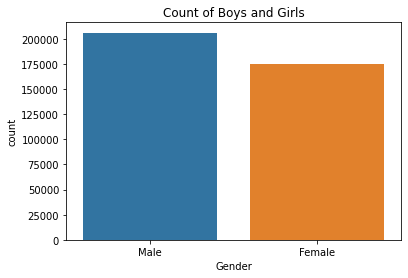

In [37]:
# check the Statics of Males and Females
sns.countplot(df['Gender'])
plt.title('Count of Boys and Girls')

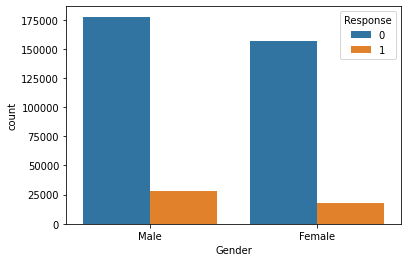

In [38]:
#now check for how many are intrested or not intrested
sns.countplot(x= 'Gender', hue = 'Response', data = df)

The total number of males are more than 20000 where as girls are around 175000.

the intrested males are around 175000 and not intrested stands at 25000.

for Females its around 150000 intrested and less than 25000 for not intrested

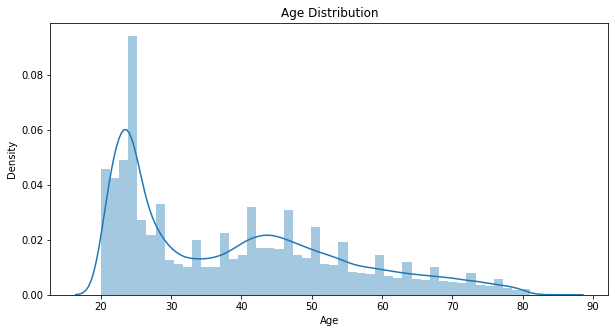

In [39]:
# check for Data Distribution
fig = plt.figure(figsize = (10,5))
sns.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

# The age column is Positively Skewed

check for outliers

In [40]:
df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

Text(0.5, 1.0, 'Age Boxplot')

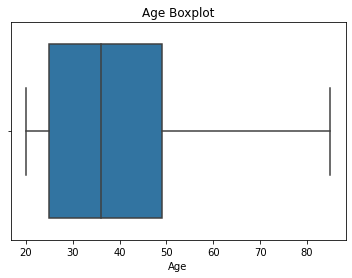

In [41]:
sns.boxplot(df['Age'])
plt.title('Age Boxplot')

Text(0.5, 1.0, 'Age Distribution with Response')

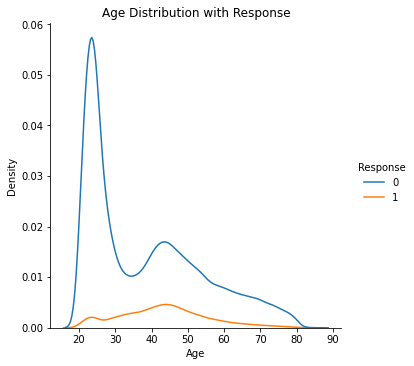

In [42]:
sns.displot(x = 'Age', hue = 'Response', data= df, kind = 'kde')
plt.title('Age Distribution with Response')

From the above graph we can say, Age 40 to 50 years people are intrested

#DRIVING LICENSE

In [44]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Text(0.5, 0, 'Driving License')

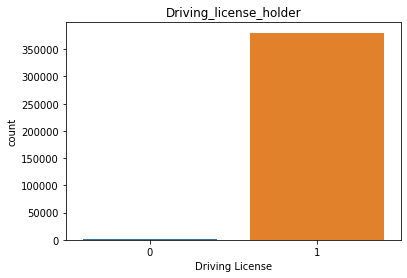

In [57]:
sns.countplot(df['Driving_License'])
plt.title('Driving_license_holder')
plt.xlabel("Driving License")

[Text(0, 0, 'without DL'), Text(0, 0, 'DL')]

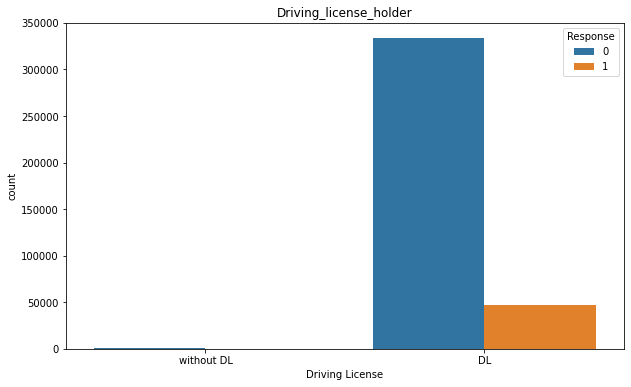

In [69]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca()
sns.countplot(df['Driving_License'], hue=df['Response'])
plt.title('Driving_license_holder')
plt.xlabel("Driving License")
ax.xaxis.set_ticklabels(['without DL','DL'])

From the graph we can see the number of Without DL Customer is low and most of the customers with DL are uninterested

In [72]:
#count the number of intrested customer with or without License
df.groupby('Driving_License')['Response'].value_counts()

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Response, dtype: int64

Only 41 of the 812 customers without DL are interested in vehicle insurance.

We can also explore the age-wise distribution of people with DL in order to compare it with our earlier plot of age-wise distribution of response.

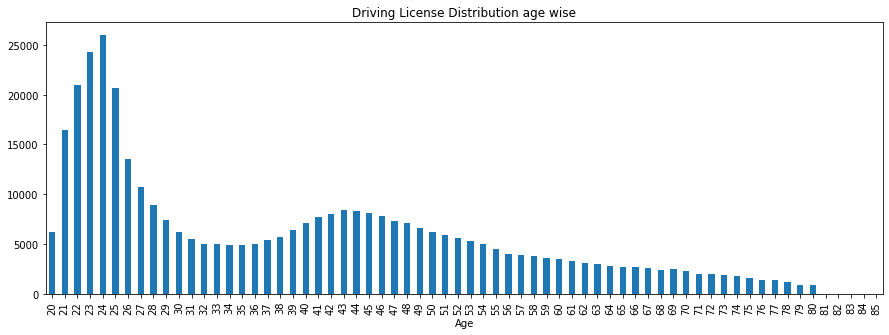

In [76]:
#Distribution graph of Driving license holder Age wise
plt.figure(figsize = (15,5))
df.groupby('Age')['Driving_License'].sum().plot(kind = 'bar')
plt.title('Driving License Distribution age wise')
plt.show()

The count of Driving license holder is low for older customer this might be the reason  for low number of customer not intrested in that section.

Previously_Insured

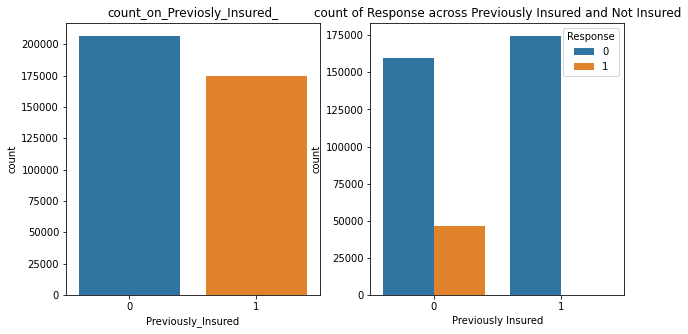

In [81]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(df['Previously_Insured'])
plt.title('count_on_Previosly_Insured_')

plt.subplot(1,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Response', data = df)
plt.title('count of Response across Previously Insured and Not Insured')
plt.xlabel("Previously Insured")
plt.show()

We can see that out of the customers who have already insured, almost no one is interested in the vehicle insurance. 

In [85]:
#check the number of previously insured people who are still interested.
df.groupby('Previously_Insured')['Response'].sum()

Previously_Insured
0    46552
1      158
Name: Response, dtype: int64

only 158 customer out of previosly insured customer are still intreseted

Age of Vehicle

In [91]:
df['Vehicle_Age'].unique()
# count of each categories
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

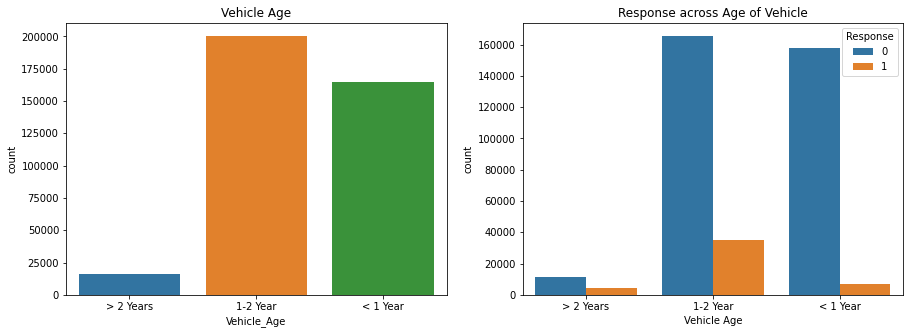

In [96]:
#graph
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(df['Vehicle_Age'])
plt.title('Vehicle Age')

#Response wise graph
plt.subplot(1,2,2)
sns.countplot(x = 'Vehicle_Age', hue = 'Response', data = df)
plt.title("Response across Age of Vehicle")
plt.xlabel('Vehicle Age')

plt.show()


In [105]:
df.groupby('Response')['Vehicle_Age'].value_counts()

Response  Vehicle_Age
0         1-2 Year       165510
          < 1 Year       157584
          > 2 Years       11305
1         1-2 Year        34806
          < 1 Year         7202
          > 2 Years        4702
Name: Vehicle_Age, dtype: int64

for vehicle age 1-2 years category, the number of interested customers is 34806 and uninterested customers is 165510 while in case of vehicle age >2 years category, interested customers is only 4702 and uninterested customers is 11305. 

<Figure size 648x504 with 0 Axes>

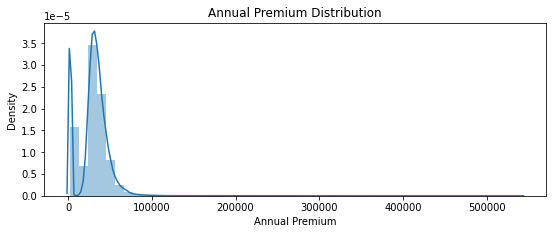

<Figure size 648x504 with 0 Axes>

In [111]:
plt.figure(figsize = (9,7))

# distribution of annual premium
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'])
plt.title('Annual Premium Distribution')
plt.xlabel("Annual Premium")
plt.figure(figsize = (9,7))

In [112]:
data['Annual_Premium'].value_counts().sort_values(ascending = False)

2630.0      64877
69856.0       140
39008.0        41
38287.0        38
45179.0        38
            ...  
16882.0         1
102370.0        1
15647.0         1
51800.0         1
69845.0         1
Name: Annual_Premium, Length: 48838, dtype: int64

There are a lot of customers paying annual premium of 2630 leading to the peak near zero.

Text(0.5, 6.79999999999999, 'Annual Premium')

<Figure size 720x360 with 0 Axes>

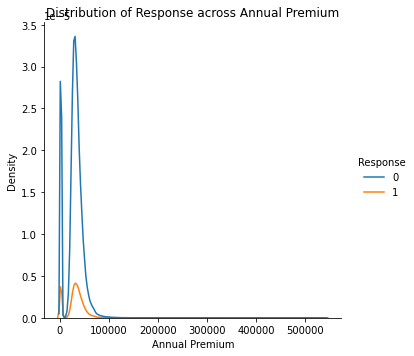

In [121]:
# density estimation using kde
# distribution of interested and uninterested response across annual premium
plt.figure(figsize = (10,5))
sns.displot(x = 'Annual_Premium', hue = 'Response', data = data, kind = 'kde')
plt.title('Distribution of Response across Annual Premium')
plt.xlabel("Annual Premium")

Both responses have similar distribution but with the Uninterested customers distribution having much higher magnitude.

In [123]:
df['Policy_Sales_Channel']

0          26.0
1          26.0
2          26.0
3         152.0
4         152.0
          ...  
381104     26.0
381105    152.0
381106    160.0
381107    124.0
381108     26.0
Name: Policy_Sales_Channel, Length: 381109, dtype: float64

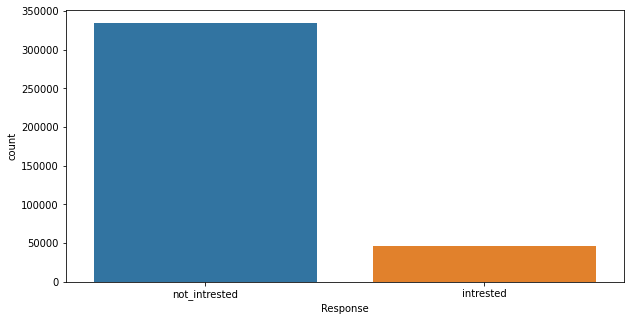

In [43]:
# Response is our Target or Dependent variable
fig = plt.figure(figsize = (10,5))
axes = fig.gca()
sns.countplot(df['Response'])
axes.xaxis.set_ticklabels(['not_intrested','intrested'])
plt.show()
